## Q1. Install MLflow

In [1]:
import mlflow

In [2]:
# Run the mlflow version command
print(mlflow.__version__)

2.22.0


## Q2. Download and preprocess the data

In [ ]:
# Download the data files
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet -P /workspaces/mlops-zoomcamp/homework2/data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet -P /workspaces/mlops-zoomcamp/homework2/data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-03.parquet -P /workspaces/mlops-zoomcamp/homework2/data

--2025-05-11 13:21:01--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.163, 18.239.38.83, 18.239.38.181, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.38.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1427002 (1.4M) [binary/octet-stream]
Saving to: ‘/workspaces/mlops-zoomcamp/homework2/data/green_tripdata_2023-01.parquet’

green_tripdata_2023 100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2025-05-11 13:21:01 (119 MB/s) - ‘/workspaces/mlops-zoomcamp/homework2/data/green_tripdata_2023-01.parquet’ saved [1427002/1427002]

--2025-05-11 13:21:02--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.163, 18.239.38.181, 18.239.38.147, ...
Connecting to d37ci6vzurychx.cloudfront.net

In [3]:
# Process the data
!python preprocess_data.py --raw_data_path ./data --dest_path ./output

In [4]:
# Check the output
!ls -l ./output
print('\nNumber of files in output directory:')
!ls ./output | wc -l

total 7016
-rw-rw-rw- 1 codespace codespace  131004 May 11 15:43 dv.pkl
-rw-rw-rw- 1 codespace codespace 2458698 May 11 15:43 test.pkl
-rw-rw-rw- 1 codespace codespace 2374518 May 11 15:43 train.pkl
-rw-rw-rw- 1 codespace codespace 2215824 May 11 15:43 val.pkl

Number of files in output directory:
4


## Q3. Train a model with autolog

In [5]:
# Train the model
!python train.py --data_path ./output

RMSE: 5.431162180141208


In [25]:
# Run the MLflow UI
!mlflow ui --backend-store-uri sqlite:///mlflow.db --port 5000

[2025-05-11 13:56:07 +0000] [27369] [INFO] Starting gunicorn 23.0.0
[2025-05-11 13:56:07 +0000] [27369] [INFO] Listening at: http://127.0.0.1:5000 (27369)
[2025-05-11 13:56:07 +0000] [27369] [INFO] Using worker: sync
[2025-05-11 13:56:07 +0000] [27370] [INFO] Booting worker with pid: 27370
[2025-05-11 13:56:08 +0000] [27371] [INFO] Booting worker with pid: 27371
[2025-05-11 13:56:08 +0000] [27372] [INFO] Booting worker with pid: 27372
[2025-05-11 13:56:08 +0000] [27373] [INFO] Booting worker with pid: 27373
[2025-05-11 14:04:59 +0000] [27369] [INFO] Handling signal: int
^C

Aborted!
[2025-05-11 14:04:59 +0000] [27373] [INFO] Worker exiting (pid: 27373)
[2025-05-11 14:04:59 +0000] [27371] [INFO] Worker exiting (pid: 27371)
[2025-05-11 14:04:59 +0000] [27370] [INFO] Worker exiting (pid: 27370)
[2025-05-11 14:04:59 +0000] [27372] [INFO] Worker exiting (pid: 27372)


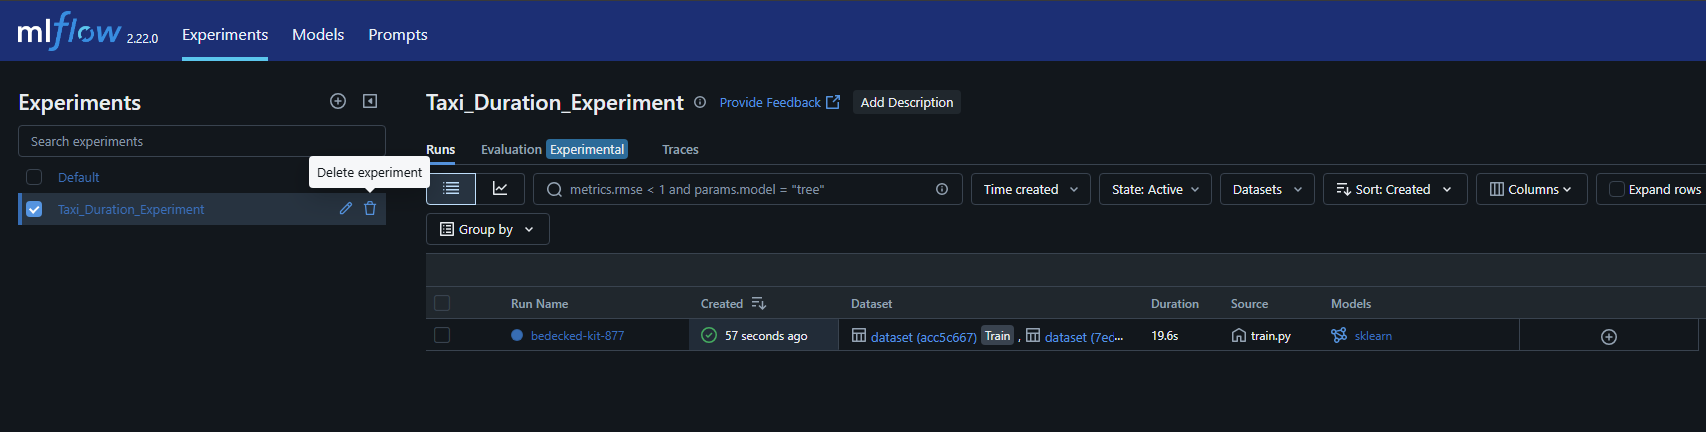

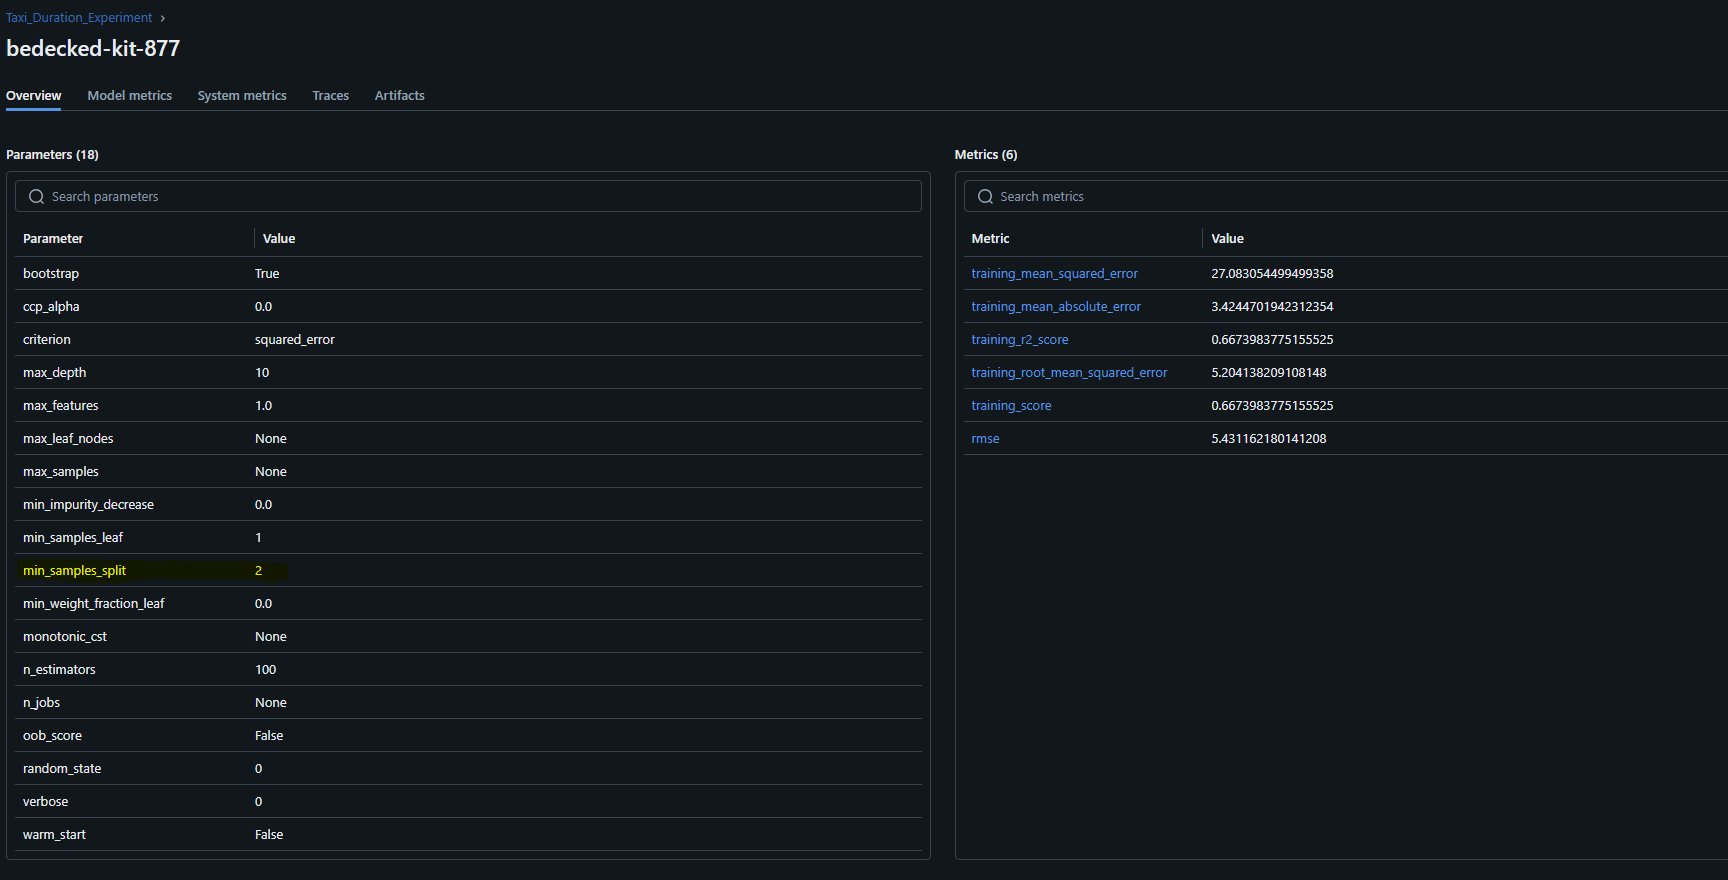

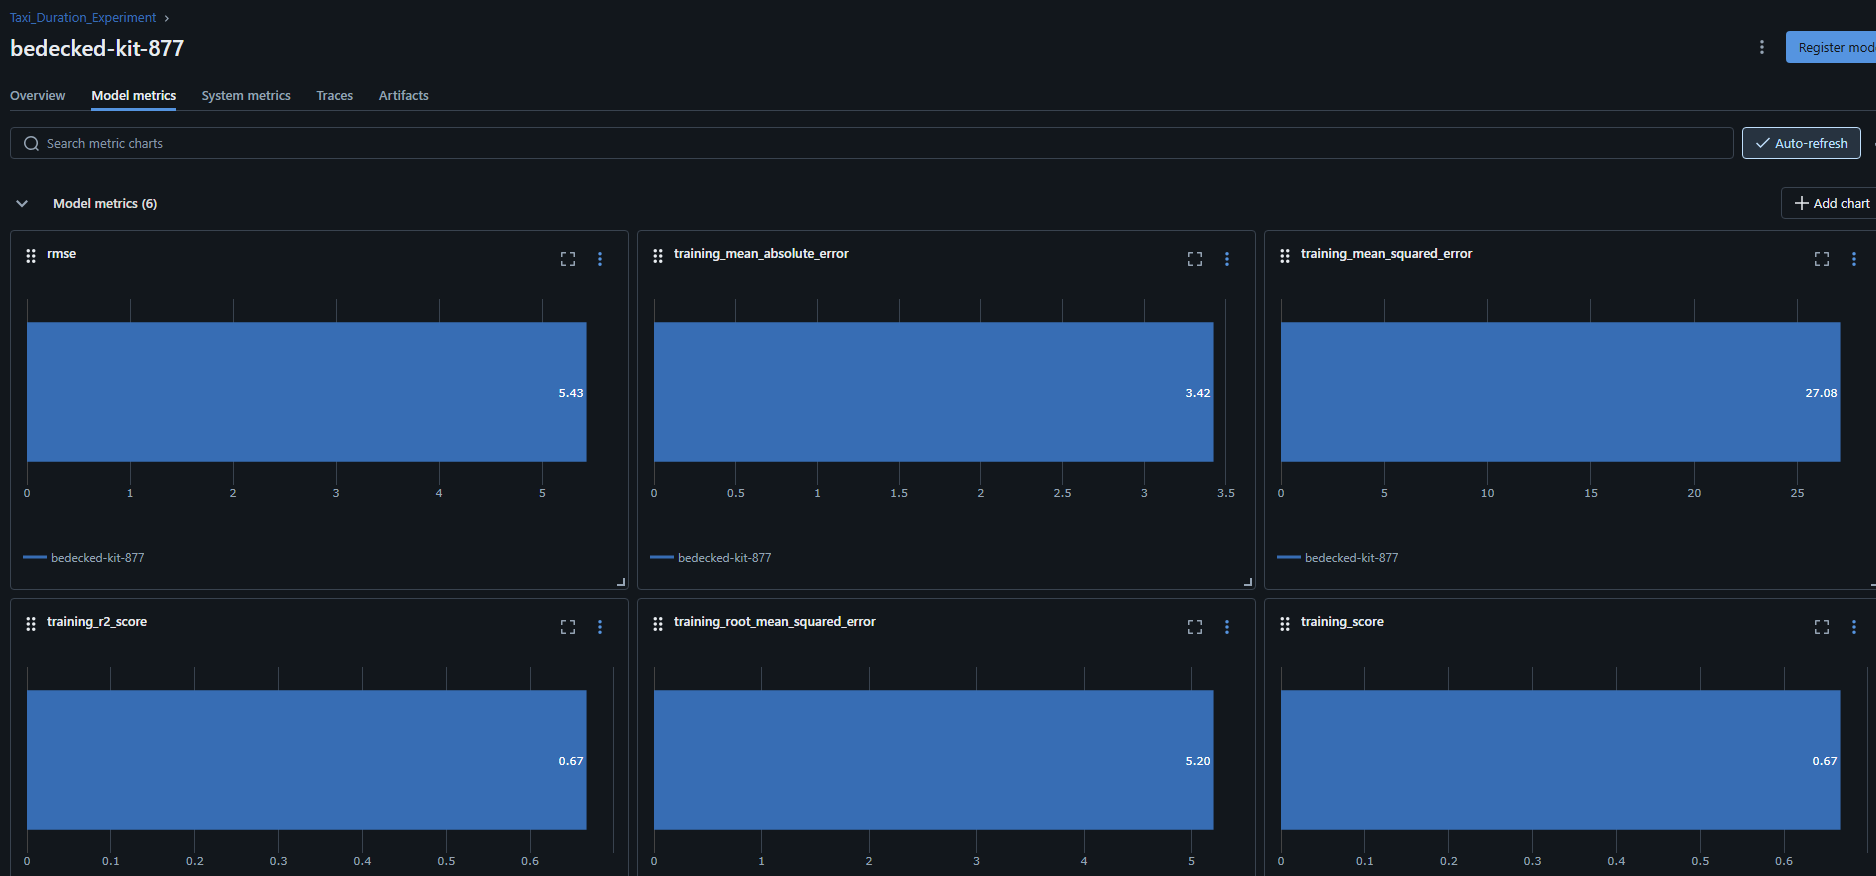

## Q4. Launch the tracking server locally

In [ ]:
!mlflow server \
  --backend-store-uri sqlite:///mlflow.db \
  --default-artifact-root ./artifacts \
  --host 0.0.0.0 \
  --port 5000

[2025-05-11 14:18:24 +0000] [36824] [INFO] Starting gunicorn 23.0.0
[2025-05-11 14:18:24 +0000] [36824] [INFO] Listening at: http://0.0.0.0:5000 (36824)
[2025-05-11 14:18:24 +0000] [36824] [INFO] Using worker: sync
[2025-05-11 14:18:24 +0000] [36825] [INFO] Booting worker with pid: 36825
[2025-05-11 14:18:24 +0000] [36826] [INFO] Booting worker with pid: 36826
[2025-05-11 14:18:25 +0000] [36827] [INFO] Booting worker with pid: 36827
[2025-05-11 14:18:25 +0000] [36828] [INFO] Booting worker with pid: 36828
[2025-05-11 14:18:37 +0000] [36824] [INFO] Handling signal: int
^C

Aborted!
[2025-05-11 14:18:37 +0000] [36826] [INFO] Worker exiting (pid: 36826)
[2025-05-11 14:18:37 +0000] [36828] [INFO] Worker exiting (pid: 36828)
[2025-05-11 14:18:37 +0000] [36825] [INFO] Worker exiting (pid: 36825)
[2025-05-11 14:18:37 +0000] [36827] [INFO] Worker exiting (pid: 36827)


## Q5. Tune model hyperparameters

In [11]:
# Run the hyperparameter optimization
!python hpo.py

2025/05/11 15:48:38 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt-v2' does not exist. Creating a new experiment.
🏃 View run marvelous-trout-392 at: http://127.0.0.1:5000/#/experiments/3/runs/b85448d1adf64f6e97aa917c8367c24a

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

🏃 View run unleashed-bear-301 at: http://127.0.0.1:5000/#/experiments/3/runs/194ee707a1364af8b8dc699c154426b4

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

🏃 View run upbeat-dove-470 at: http://127.0.0.1:5000/#/experiments/3/runs/08c2d2439173430ebfd44f5c266ec3ba

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

🏃 View run victorious-stoat-814 at: http://127.0.0.1:5000/#/experiments/3/runs/1d334210bc5d4e0690ac888267702c47

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3                    

🏃 View run grandiose-skink-646 at: http://127.0.0.1:5000/#/experiments/3/runs/1c43f407f6544

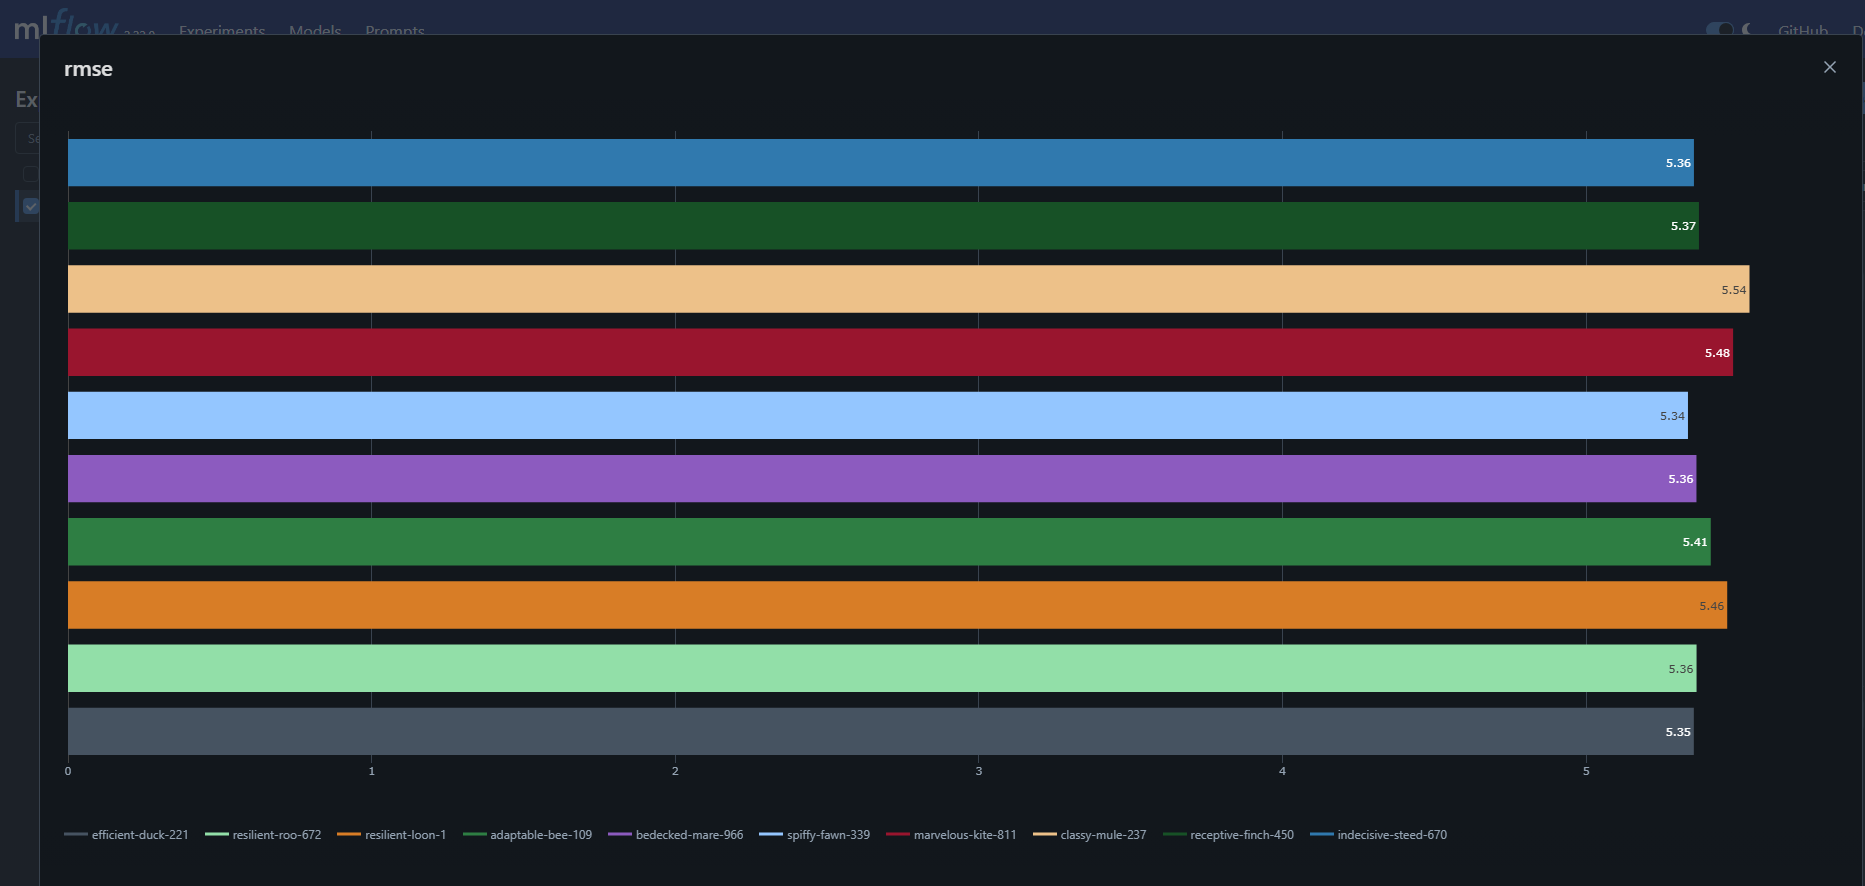

## Q6. Promote the best model to the model registry

In [ ]:
!python register_model.py --data_path ./output --top_n 5

→ Evaluating HPO run 74e478ce80734b46ba92e3369ec5d75e...
2025/05/11 16:10:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
🏃 View run serious-snail-76 at: http://127.0.0.1:5000/#/experiments/4/runs/676d3180ac714a77a6116ea6430d0dd9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
   Test RMSE: 5.5674
→ Evaluating HPO run 76afe2fe521f4daa9764e37c0363a34c...
2025/05/11 16:10:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
🏃 View run spiffy-skunk-328 at: http://127.0.0.1:5000/#/experiments/4/runs/dd4dbf75b9c44f6fb5560f88b363772f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
   Test RMSE: 5.5853
→ Evaluating HPO run 83eefea430f94ee2be1b77a5ec10f73d...
2025/05/11 16:10:40 WARNING mlflow.models.model: Model logg

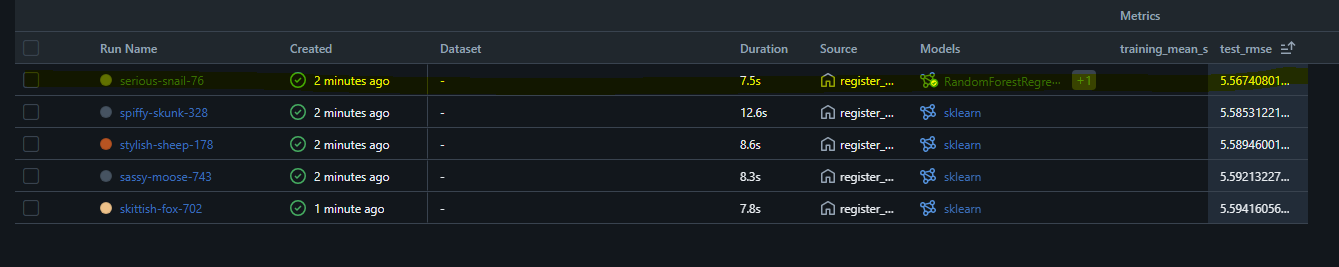